In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

In [ ]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(parent_dir)
print(parent_dir)
interpolated_dir = os.path.join(parent_dir, "dataset_interpolated_fixed")
# features = ["game_completed", "relative_strength", "score_difference", "type.id", "home_has_possession", "end.down", "end.yardsToEndzone", "end.distance", "field_position_shift", "home_timeouts_left", "away_timeouts_left"]
features = ["relative_strength", "score_difference", "home_has_possession", "end.down", "end.distance", "end.yardsToEndzone",  "home_timeouts_left", "away_timeouts_left"]

/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL/ML


In [3]:
# Reset the modules
modules_to_reload = [
    'process_data',
]

for module_name in modules_to_reload:
    if module_name in sys.modules:
        del sys.modules[module_name]

import process_data

training_data = process_data.load_data(interpolated_dir, 
                                       years = [2016, 2017,2018, 2019, 2020, 2021, 2022], 
                                       history_length = 0, 
                                       features = features, 
                                       label_feature = "home_win")

validation_data = process_data.load_data(interpolated_dir, 
                                       years = [2023], 
                                       history_length = 0, 
                                       features = features, 
                                       label_feature = "home_win",
                                       train = True
                                       )
                                       
test_data = process_data.load_data(interpolated_dir, 
                                       years = [2024],
                                       history_length = 0, 
                                       features = features, 
                                       label_feature = "home_win",
                                       train = False
                                       )

Loading data for 2022
  Processing 271 CSV files in parallel with 8 workers...
  Completed processing 2022
Loading data for 2024
skipping  2024
Loading data for 2023
skipping  2023
Loading data for .DS_Store
Loading data for 2017
  Processing 254 CSV files in parallel with 8 workers...
  Completed processing 2017
Loading data for 2019
  Processing 256 CSV files in parallel with 8 workers...
  Completed processing 2019
Loading data for 2021
  Processing 272 CSV files in parallel with 8 workers...
  Completed processing 2021
Loading data for 2020
  Processing 255 CSV files in parallel with 8 workers...
  Completed processing 2020
Loading data for 2018
  Processing 255 CSV files in parallel with 8 workers...
  Completed processing 2018
Loading data for 2016
  Processing 254 CSV files in parallel with 8 workers...
  Completed processing 2016
Loading data for 2022
skipping  2022
Loading data for 2024
skipping  2024
Loading data for 2023
  Processing 272 CSV files in parallel with 8 workers.

In [ ]:
modules_to_reload = [
    'models.direct_prediction_network',
    'models.direct_prediction_network_transformer',
]

for module_name in modules_to_reload:
    if module_name in sys.modules:
        del sys.modules[module_name]

from models.direct_prediction_network import setup_direct_models
from models.direct_prediction_network_transformer import setup_direct_transformer_models


models = setup_direct_models(training_data, validation_data, num_models = 201, features=features, optimize_hyperparams=False)

Original data shape: (3244, 8)
Flattened data shape: (3244, 8)
Using provided test data as validation: 3244 train, 526 validation

Training direct prediction model for timestep range [0.0, 0.005]


TypeError: Can't instantiate abstract class DirectClassifier with abstract methods _recreate_model_from_config, load_model

In [ ]:
model = models[0.99]
features = ["relative_strength", "score_difference", "home_has_possession", "end.down", "end.distance", "end.yardsToEndzone",  "home_timeouts_left", "away_timeouts_left"]
data_point = [0.5, -4, 1, 1, 1, 1, 1, 1]
model.predict_proba(np.array([data_point]))

array([[0.7768642 , 0.22313581]], dtype=float32)

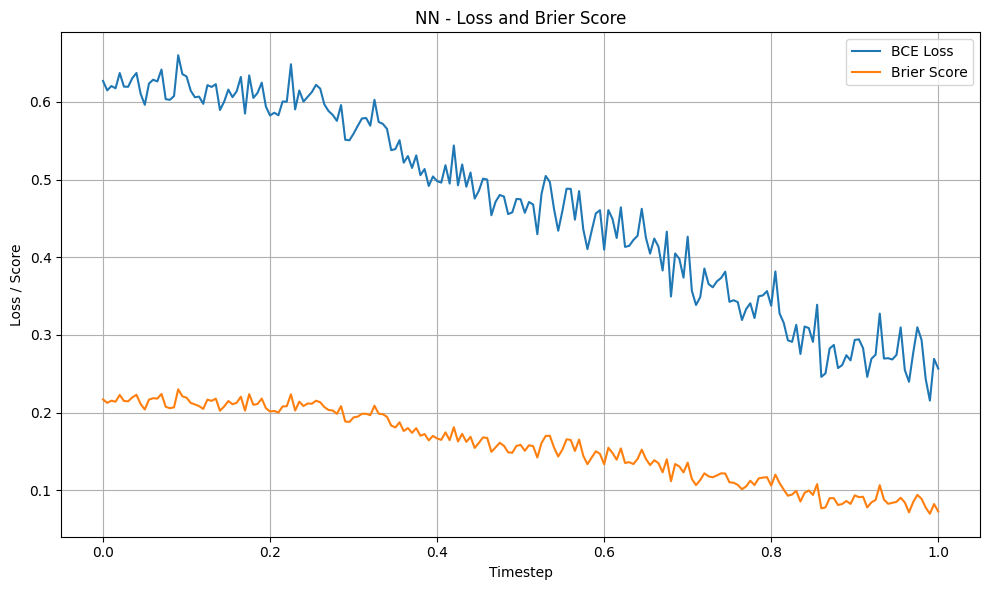

In [12]:
import process_data
modules_to_reload = [
    'process_data',
]

for module_name in modules_to_reload:
    if module_name in sys.modules:
        del sys.modules[module_name]

x = process_data.plot_loss(models, test_data, "NN")

In [16]:
%load_ext autoreload
%autoreload 2

In [17]:
%reload_ext autoreload

PermutationExplainer explainer: 365it [00:13,  6.95it/s]                         


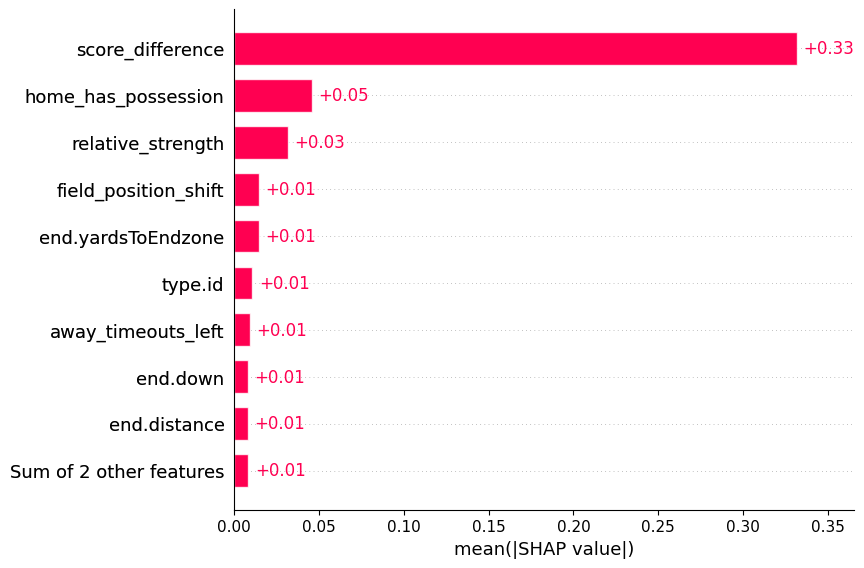

.values =
array([[-5.22444304e-01, -1.75063103e-03,  3.57689166e-03, ...,
        -8.23456611e-03,  1.70319158e-03,  2.02856011e-03],
       [-5.26710978e-01, -9.79733649e-04,  1.93670555e-03, ...,
        -3.83939714e-03,  9.37581235e-04,  1.58019682e-03],
       [-4.83338309e-01, -8.45959098e-04, -3.30062502e-04, ...,
        -8.01757826e-03, -9.87743796e-04,  2.55215049e-03],
       ...,
       [ 2.53334097e-01, -5.68626230e-03, -2.58235223e-02, ...,
        -2.59786324e-02, -3.19025597e-03, -5.29306458e-02],
       [ 2.77540613e-01,  2.48721609e-04, -1.46657779e-02, ...,
        -3.31360355e-02, -1.49815454e-02,  2.71557215e-03],
       [ 2.03108740e-01, -9.69217704e-04,  1.02640502e-02, ...,
        -9.90007754e-04,  4.29256542e-04,  5.13956415e-03]])

.base_values =
array([0.54075061, 0.54075061, 0.54075061, 0.54075061, 0.54075061,
       0.54075061, 0.54075061, 0.54075061, 0.54075061, 0.54075061,
       0.54075061, 0.54075061, 0.54075061, 0.54075061, 0.54075061,
       0.5407506

In [ ]:
modules_to_reload = [
    'models.direct_prediction_network',
    'models.direct_prediction_network_transformer',
    'models.utils'
]
from models.utils import SHAP_analysis

SHAP_analysis(models, training_data, test_data, "NN", "shap_values/NN", num_threads = 1)

In [13]:
from process_data import write_predictions
from sklearn.preprocessing import StandardScaler
# Reload the modules
modules_to_reload = [
    'process_data',
]

for module_name in modules_to_reload:
    if module_name in sys.modules:
        del sys.modules[module_name]


write_predictions(models, interpolated_dir, [2024], 0, features, replace_nan_val = 0, phat_b = "NN_phat_b")


Loading data for 2024
Processed file:  game_401671629.csv
Processed file:  game_401671601.csv
Processed file:  game_401671826.csv
Processed file:  game_401671832.csv
Processed file:  game_401671749.csv
Processed file:  game_401671775.csv
Processed file:  game_401671761.csv
Processed file:  game_401671760.csv
Processed file:  game_401671774.csv
Processed file:  game_401671748.csv
Processed file:  game_401671833.csv
Processed file:  game_401671827.csv
Processed file:  game_401671600.csv
Processed file:  game_401671628.csv
Processed file:  game_401671616.csv
Processed file:  game_401671831.csv
Processed file:  game_401671825.csv
Processed file:  game_401671819.csv
Processed file:  game_401671762.csv
Processed file:  game_401671776.csv
Processed file:  game_401671789.csv
Processed file:  game_401671788.csv
Processed file:  game_401671777.csv
Processed file:  game_401671763.csv
Processed file:  game_401671818.csv
Processed file:  game_401671824.csv
Processed file:  game_401671830.csv
Proces